<a href="https://colab.research.google.com/github/imjunyoung404/ai-class-3-2/blob/main/%EB%8F%99%EC%9D%BC%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EB%B6%84%EB%A5%98%20%EC%88%98%ED%96%89%ED%95%98%EB%9D%BC.%20(dense%20layer%20%EB%A7%8C%20%EC%82%AC%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [26]:

X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [27]:

y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


In [28]:

y.head()

,Outcome
Pregnancies,
6,1
1,0
8,1
1,0
0,1


In [29]:

Y = pd.get_dummies(y).values

In [30]:

X = X.values

In [31]:

X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [32]:

y

,Outcome
Pregnancies,
6,1
1,0
8,1
1,0
0,1
...,...
10,0
2,0
5,0


In [33]:

Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [34]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 딥러닝 모델 생성 (Dense Layer만 사용)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 출력층, 분류 문제

# 모델 컴파일 (lr 대신 learning_rate 사용)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 테스트 데이터에 대한 평가
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 예측 수행
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6255 - loss: 0.6875 - val_accuracy: 0.7069 - val_loss: 0.6309
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6446 - loss: 0.6433 - val_accuracy: 0.7414 - val_loss: 0.5851
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7230 - loss: 0.5986 - val_accuracy: 0.7931 - val_loss: 0.5443
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7242 - loss: 0.5664 - val_accuracy: 0.7931 - val_loss: 0.5096
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7783 - loss: 0.5084 - val_accuracy: 0.7845 - val_loss: 0.4870
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7829 - loss: 0.5037 - val_accuracy: 0.8103 - val_loss: 0.4726
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7791 - loss: 0.4762 - val_accuracy: 0.8017 - val_loss: 0.4673
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7788 - loss: 0.4508 - val_accuracy: 0.8103 - val_l

In [38]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4625 - loss: 38.2337 - val_accuracy: 0.5833 - val_loss: 5.6739
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5647 - loss: 4.5313 - val_accuracy: 0.5833 - val_loss: 2.0675
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6202 - loss: 2.1109 - val_accuracy: 0.6562 - val_loss: 1.3969
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6919 - loss: 1.4557 - val_accuracy: 0.6094 - val_loss: 1.2892
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6246 - loss: 1.2084 - val_accuracy: 0.6875 - val_loss: 1.0253
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6742 - loss: 0.9213 - val_accuracy: 0.6771 - val_loss: 0.8980
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6853 - loss: 0.7913 - val_accuracy: 0.6146 - val_loss: 0.9828
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6947 - loss: 0.7528 - val_accuracy: 0.6615 - val_loss

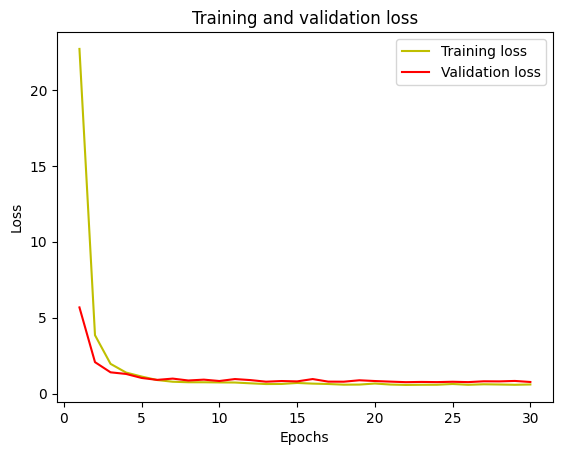

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

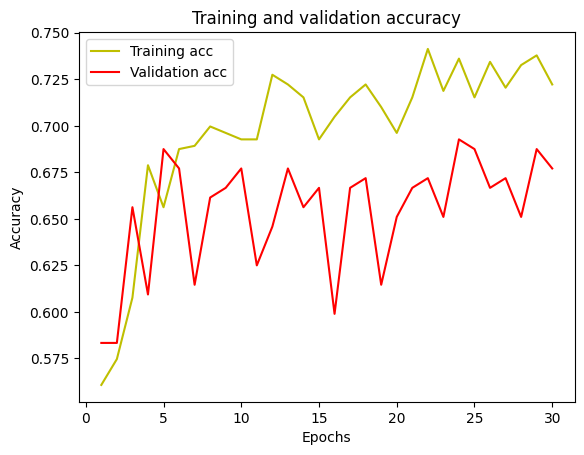

In [40]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       130
           1       0.50      0.61      0.55        62

    accuracy                           0.68       192
   macro avg       0.65      0.66      0.65       192
weighted avg       0.70      0.68      0.68       192

[[92 38]
 [24 38]]
